<a href="https://colab.research.google.com/github/dmkhlnk/Wild-Blueberry-Yield-Dataset/blob/main/BlueBerry_yields_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Необходимые импорты**

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost.callback import EarlyStopping


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
df = pd.read_csv('train.csv')

# **Анализ данных (EDA)**


In [ ]:
df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [ ]:
df = df.drop('id', axis = 1)

In [ ]:
#Пропусков нет
df.isna().sum()

,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0
MinOfLowerTRange,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [ ]:
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [ ]:
#  Данные скорее всего придётся скалировать из описательной статистики видно, что масшатаб некоторых признаков сильно отличается

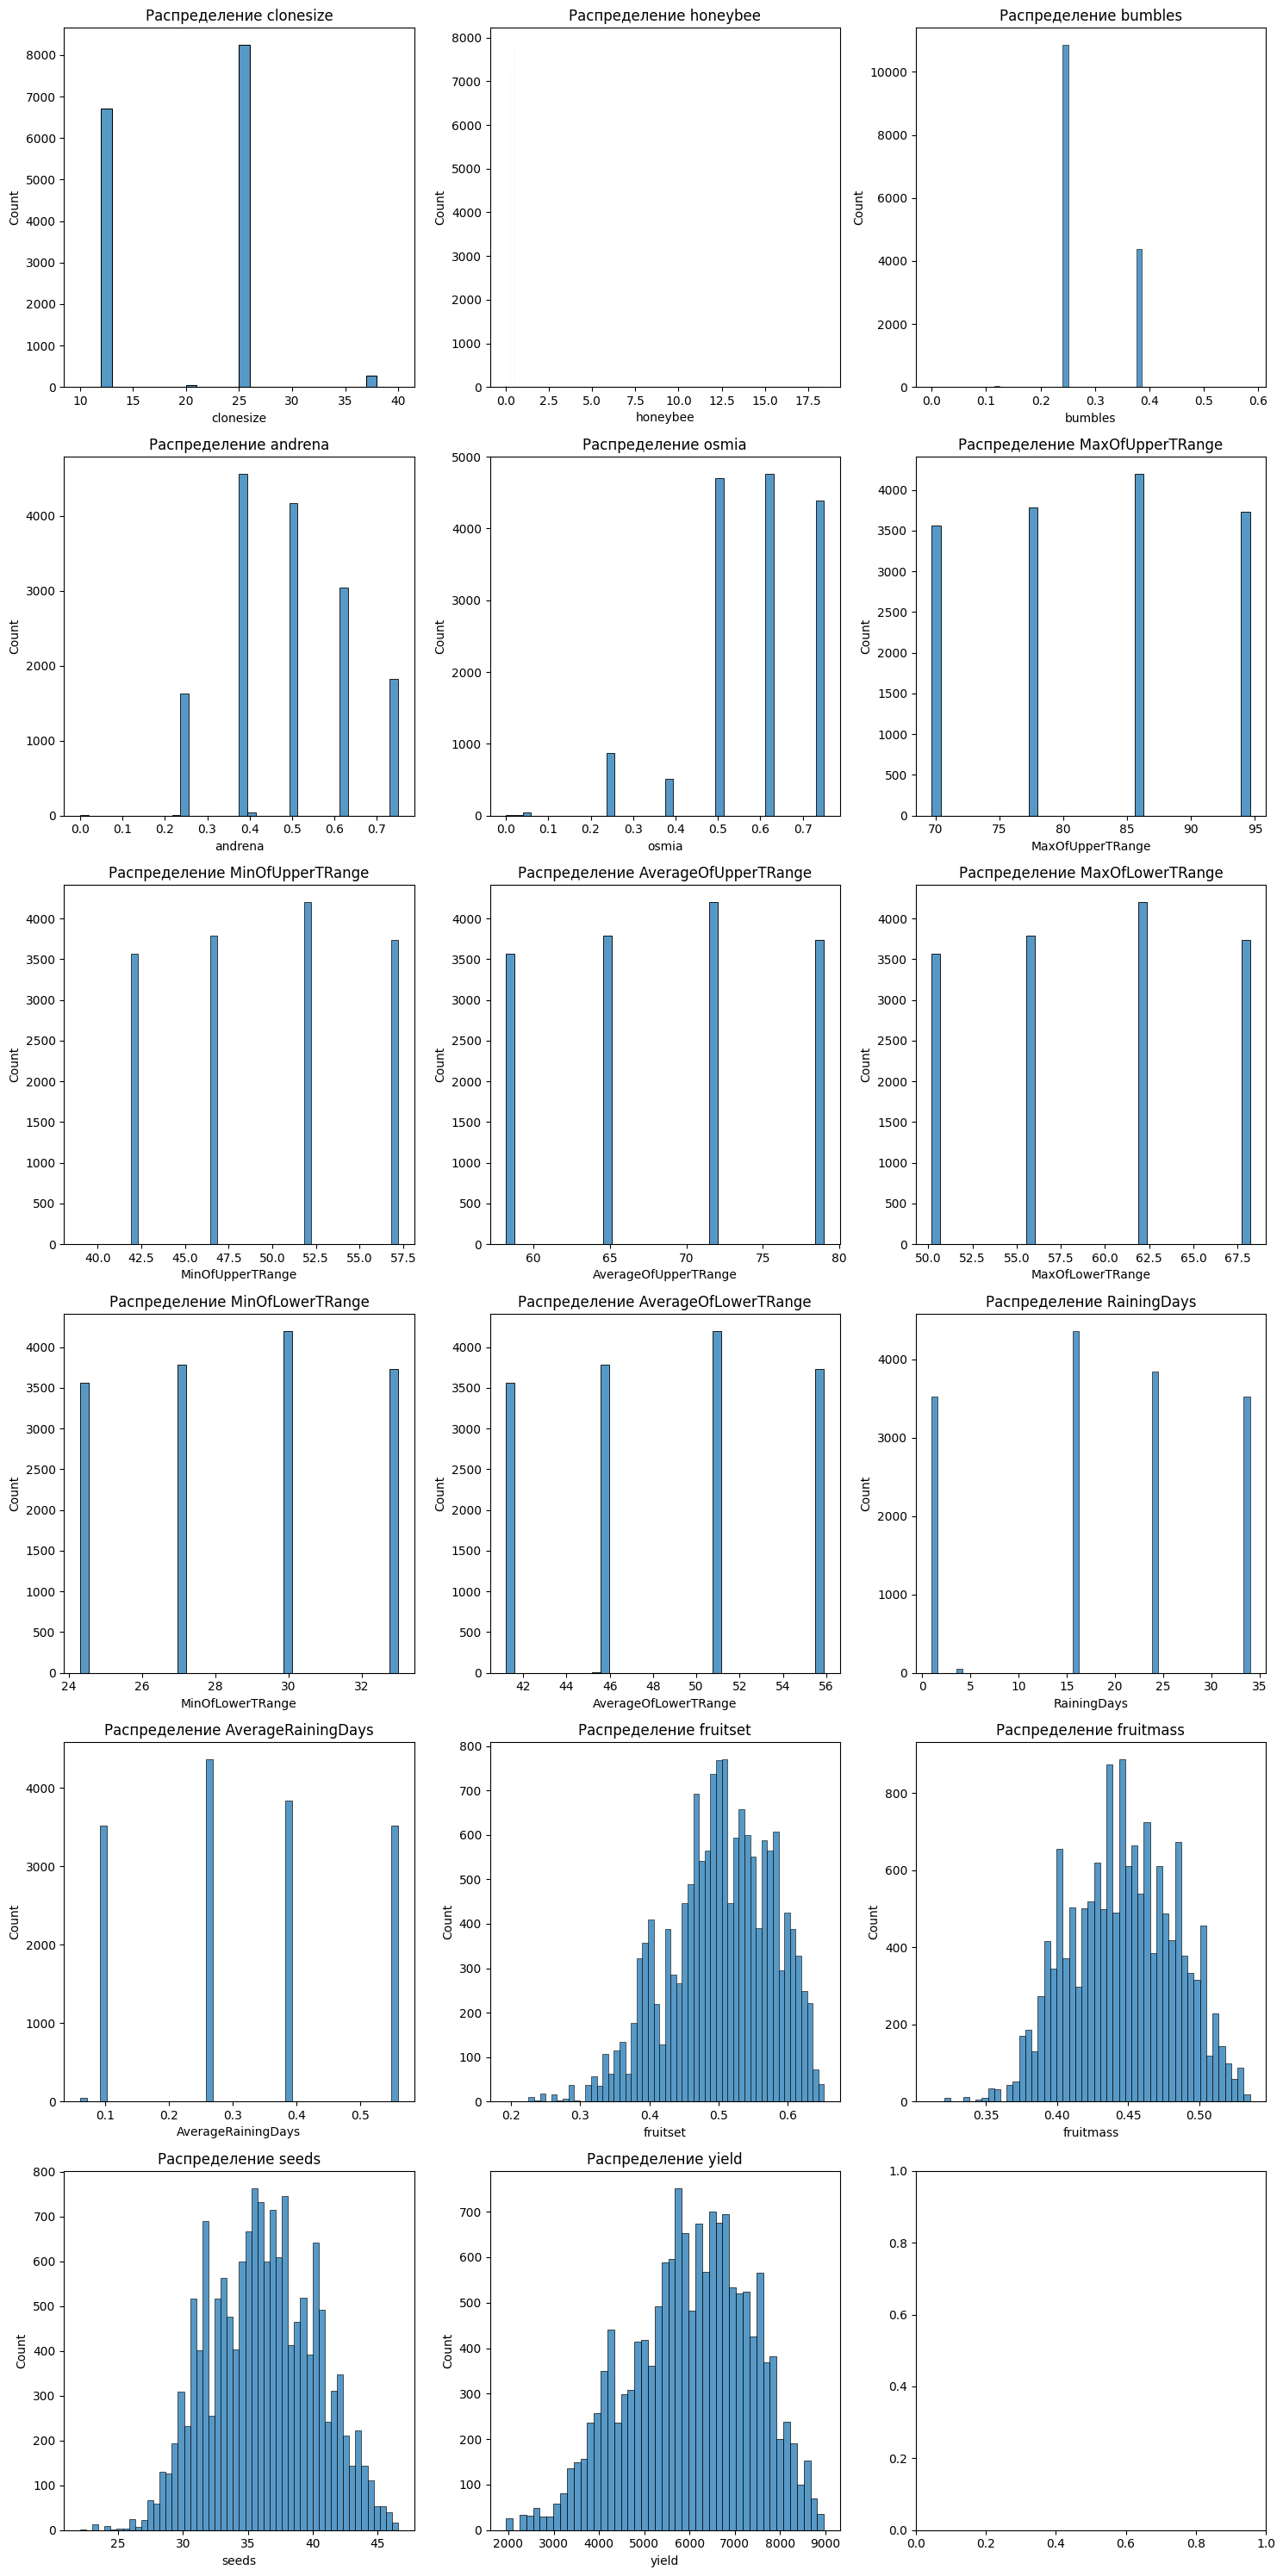

In [ ]:
nrows = len((df.columns))//3+1
fig, ax = plt.subplots(ncols= 3, nrows= nrows, figsize=(15, 5*nrows))
ax = ax.flatten()
for i, feature in enumerate(list(df.columns)):
  sns.histplot(data= df, x = feature, ax = ax[i])
  ax[i].set_title(f'Распределение {feature}')
  ax[i].set_xlabel(feature)
  ax[i].set_ylabel('Count')
  ax[i].set
plt.tight_layout()



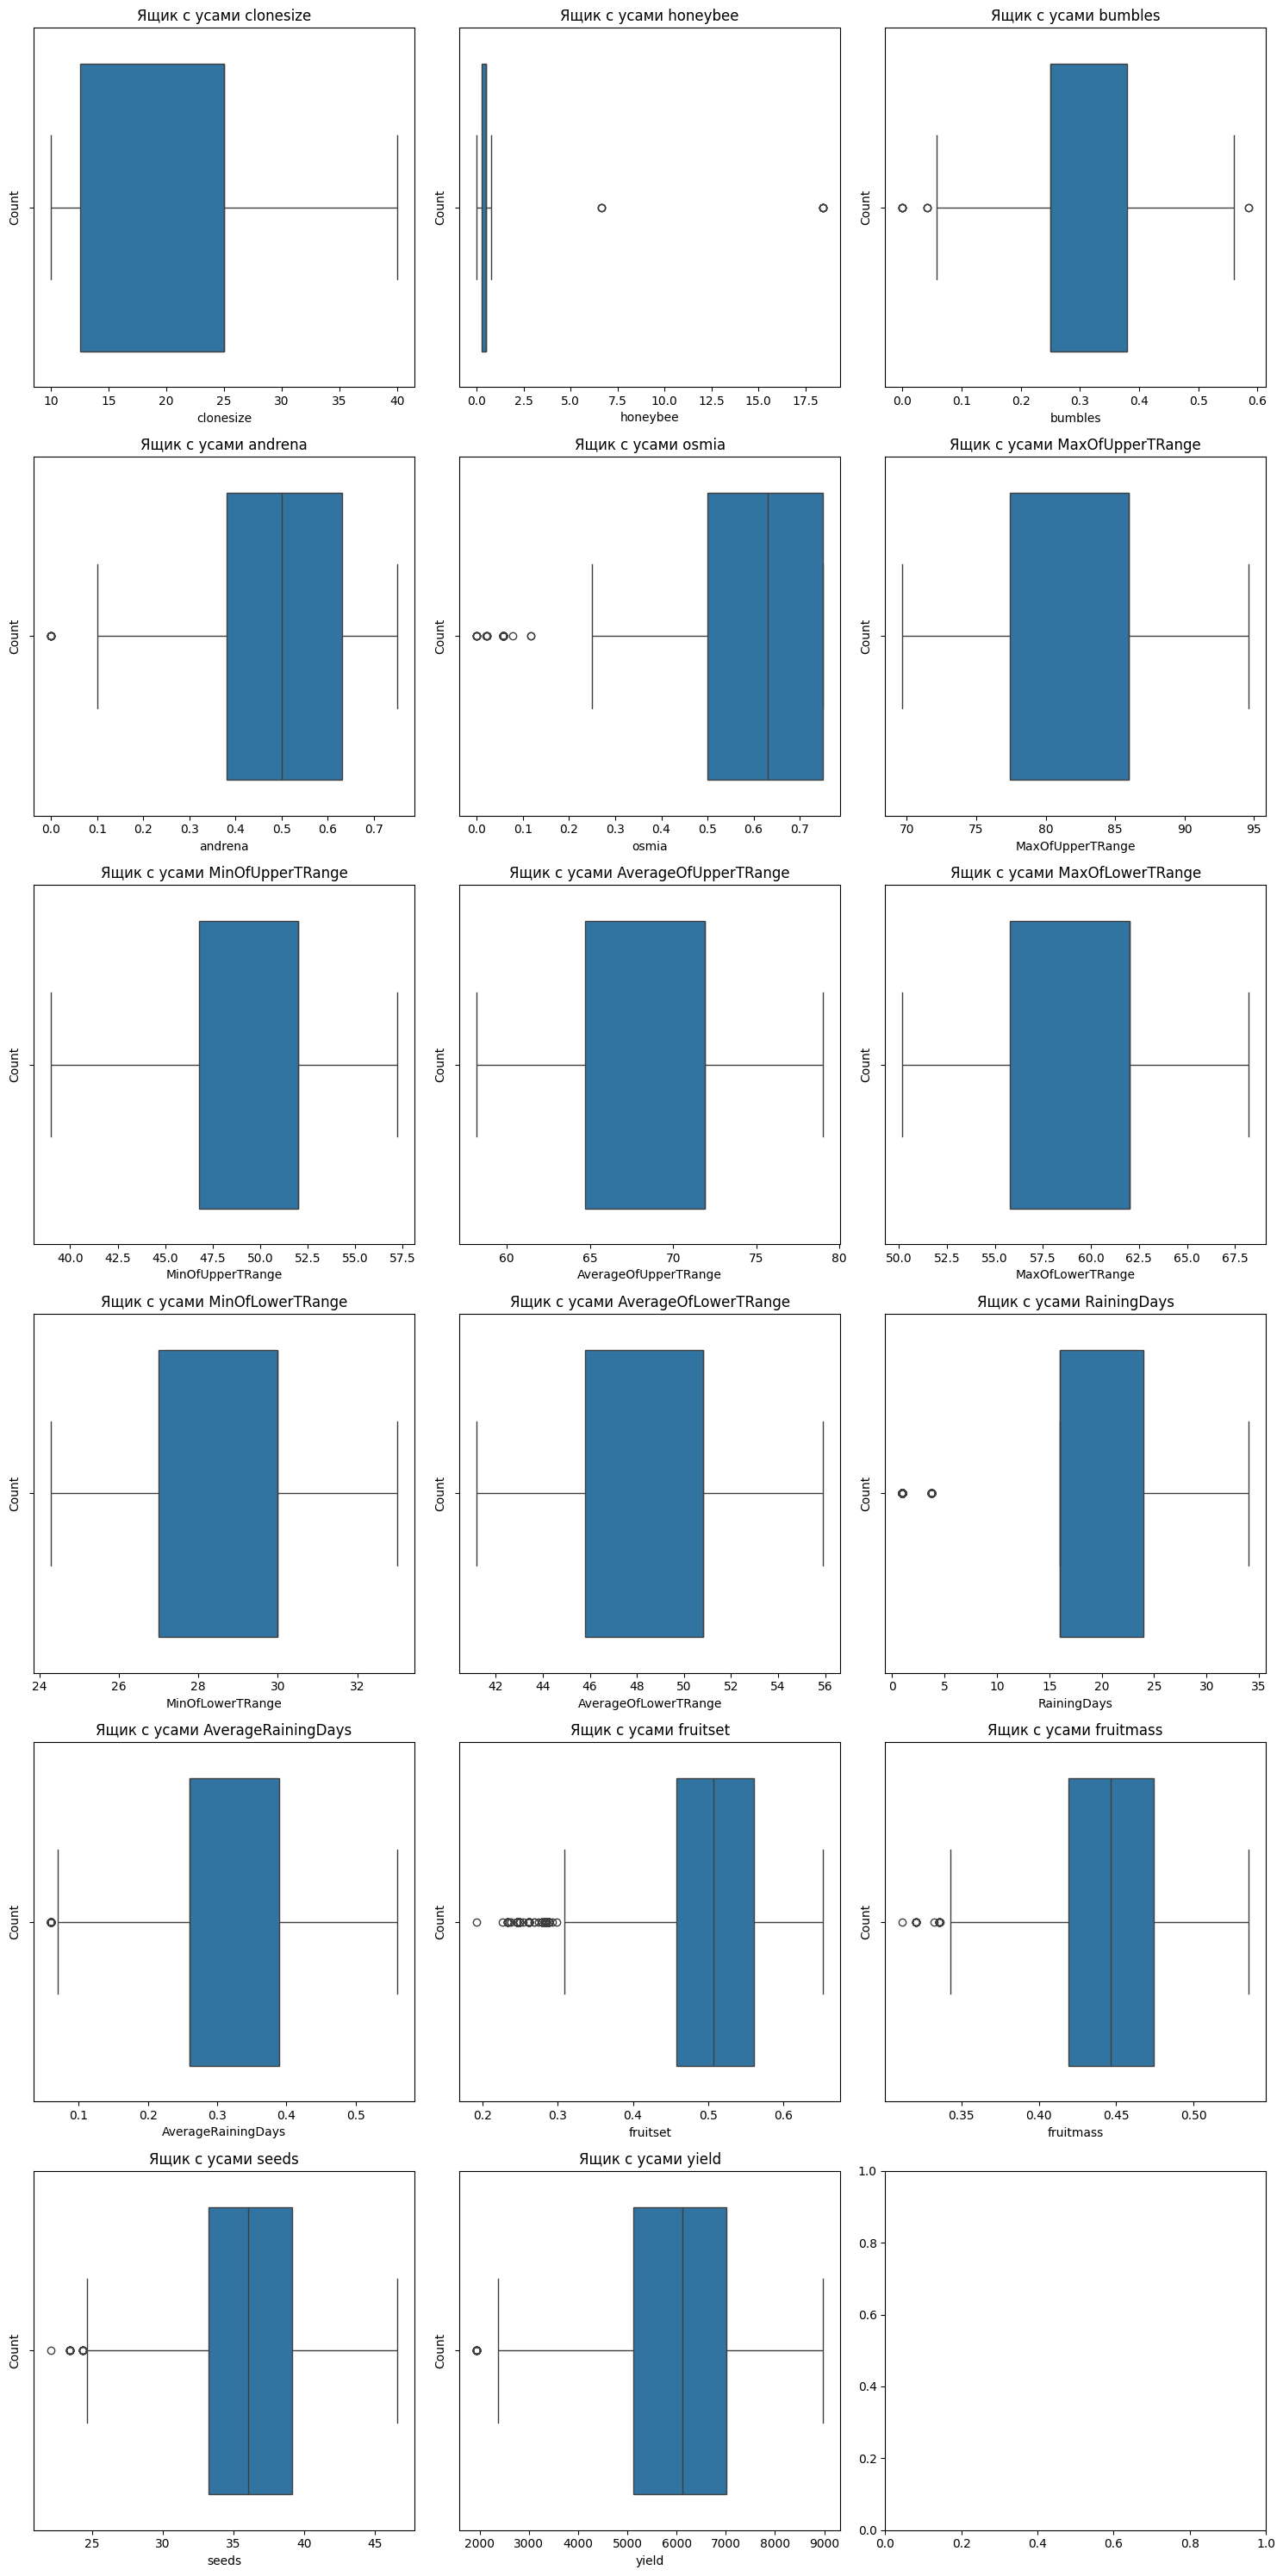

In [ ]:
nrows = len((df.columns))//3+1
fig, ax = plt.subplots(ncols= 3, nrows= nrows, figsize=(15, 5*nrows))
ax = ax.flatten()
for i, feature in enumerate(list(df.columns)):
  sns.boxplot(data= df, x = feature, ax = ax[i])
  ax[i].set_title(f'Ящик с усами {feature}')
  ax[i].set_xlabel(feature)
  ax[i].set_ylabel('Count')
  ax[i].set
plt.tight_layout()



Видно, что данные имеют различный масштаб, поэтому для моделей чувствительных к масштабу придётся применить скалирование признаков, чтобы улучшить перфоманс модели. Также можно заметить, что для некотрых признаков имеются наблюдения которые лежат ниже Q1 - IQR*1.5 что говорит о наличии выбросов в наблюдениях

<Axes: >

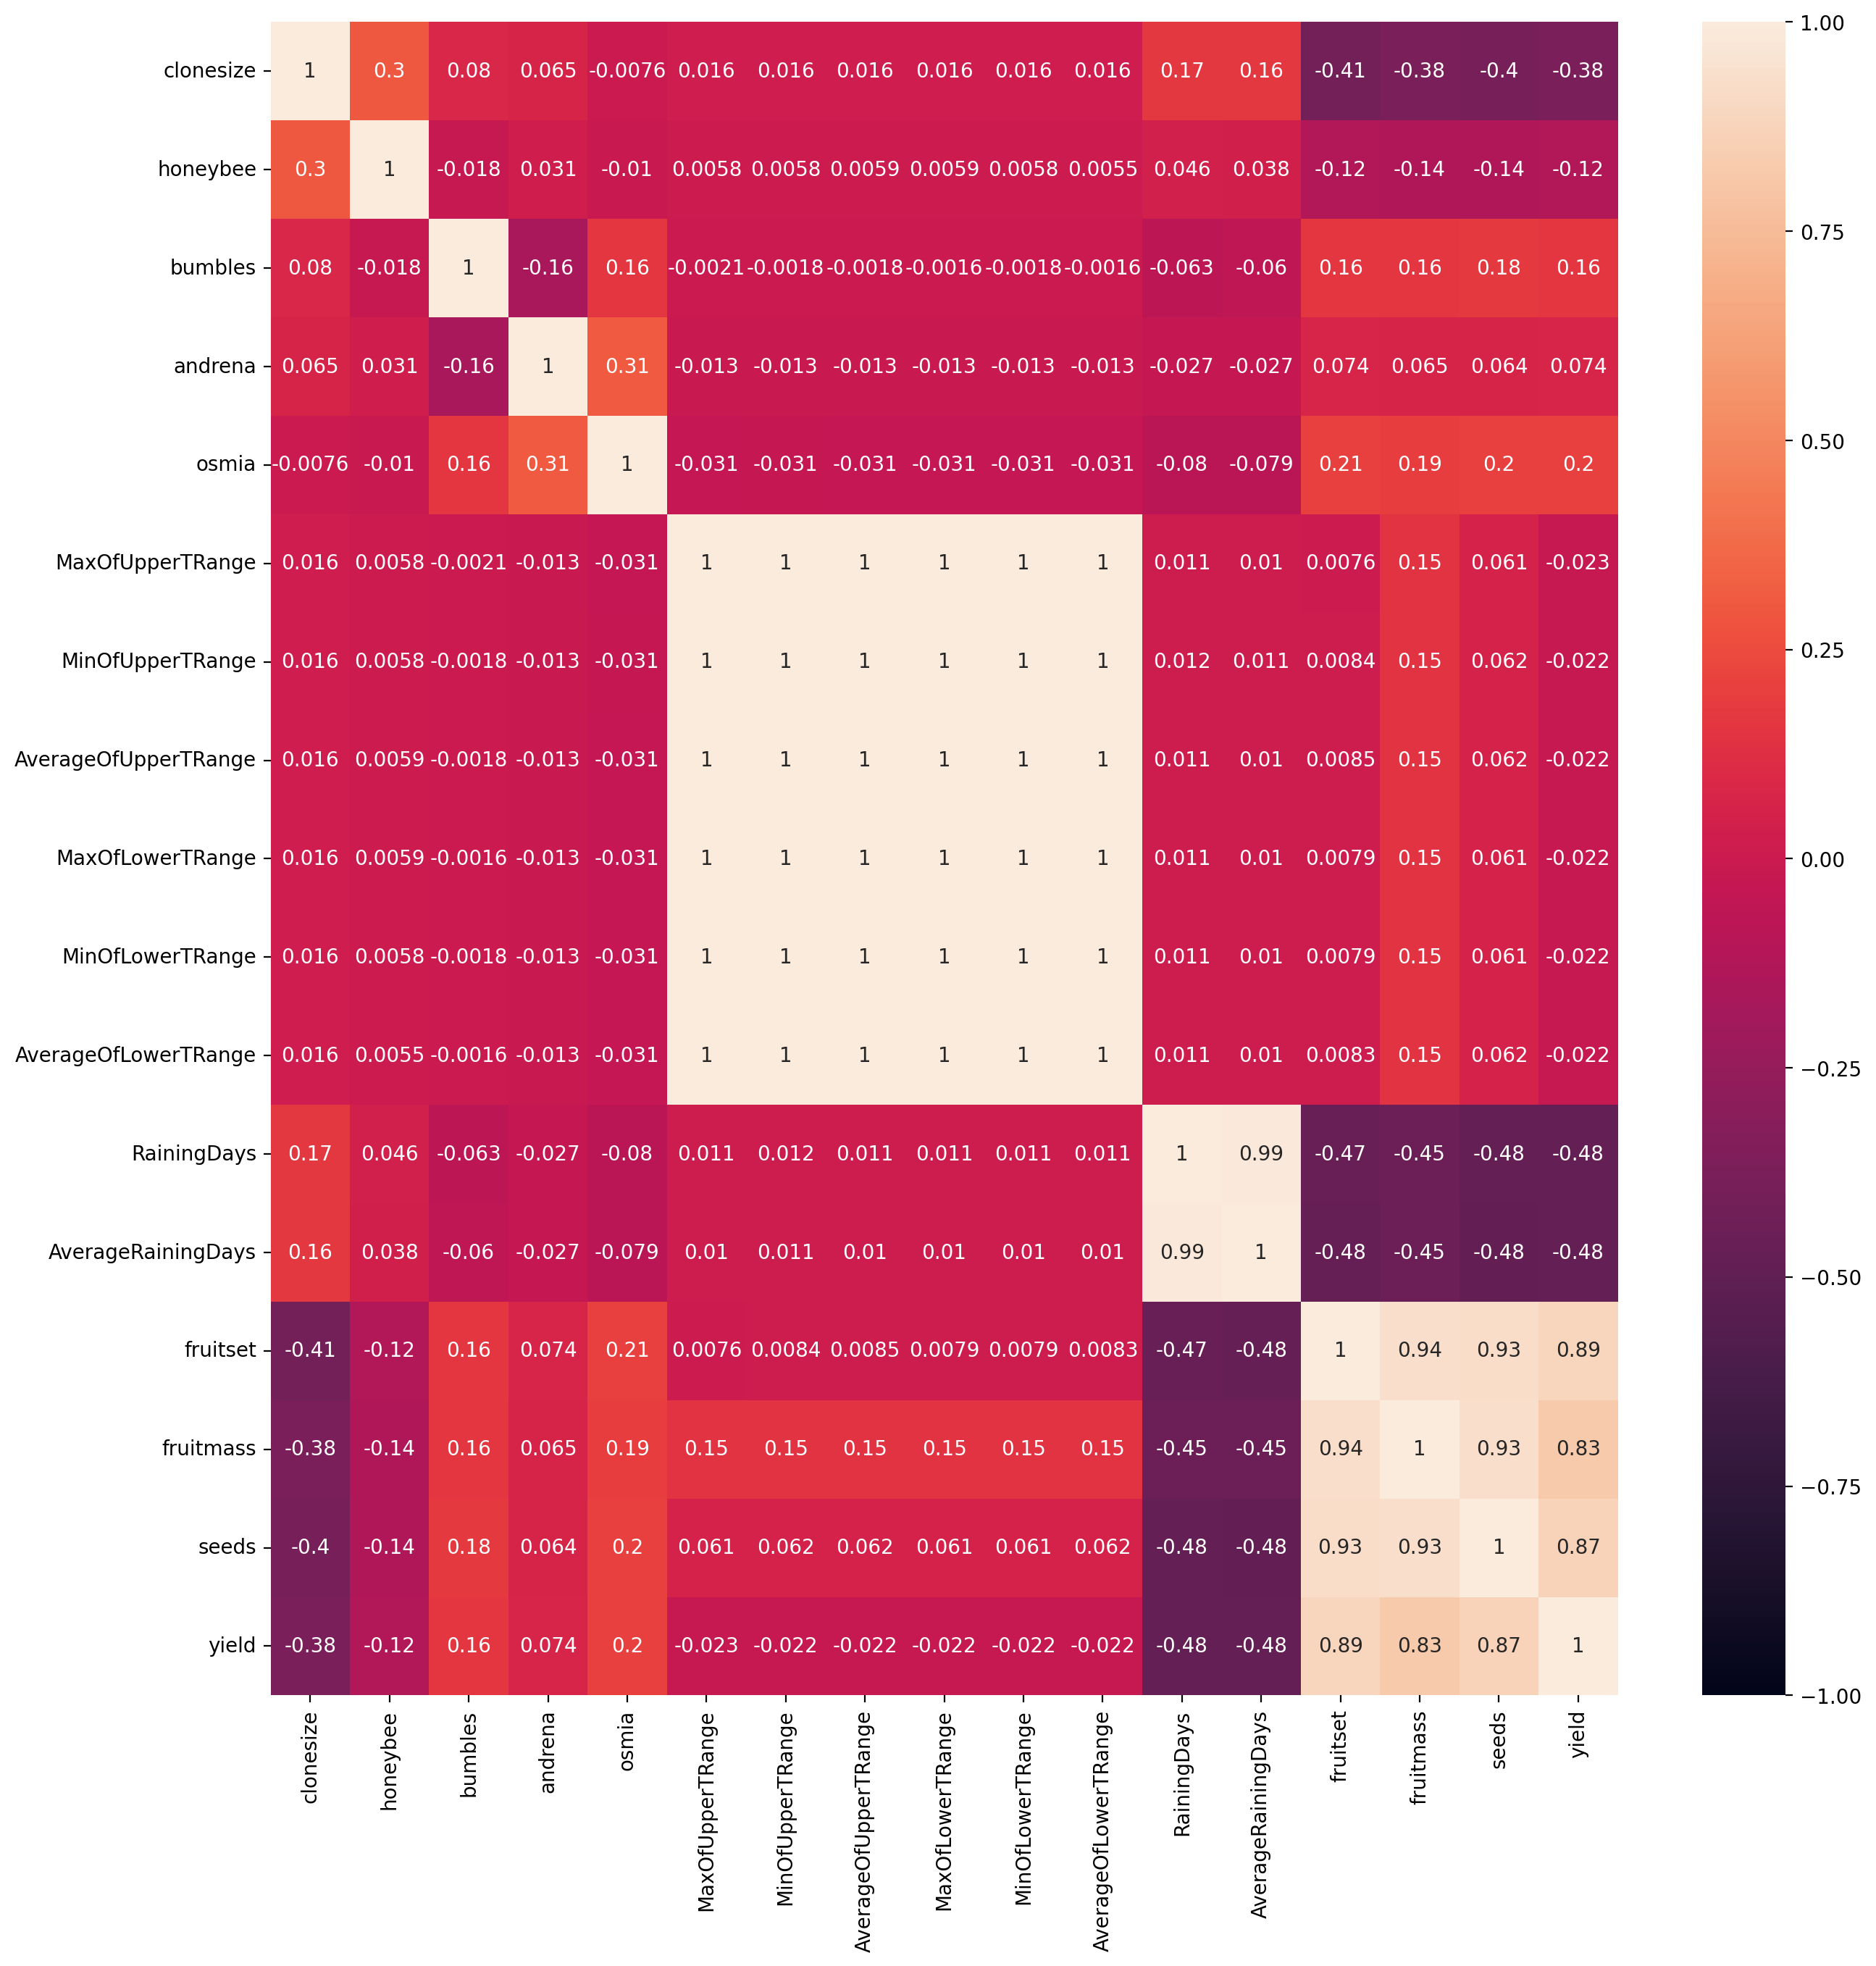

In [ ]:
plt.figure(figsize = (15, 15), dpi = 200)
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax =1)

Переменные отвечающие за колебания температуры демонстрируют чистую мультиколлинерносту: фактически функциональная зависимость: поэтому придётся избавиться от признаков между которыми корреляция равна 1, т.к при использовании алгоритма МНК матрица признакоы будет вырожденой, что приведёт к невозможности подобрать коэффициенты для модели, ну и также для других алгоритимов, которые менее чувствительны к проблемам мултиколлинерности: основанные на деревьях данные призанки будут источниками избыточной информации. Всё сказанное ранее также относится к призанками RainingDays и AverageRainingDays

Для температурных призаков можно создать дополнительную перменную, которая буде среднем высоких температур и низких температур, что можно трактовать как среднюю температуру в исследуемом сезоне, таким образом инфомация о температурных услвоиях будет сохранена, но будет решена проблема мультиколлинеарнсти

In [ ]:
df['AverageSeasonalTemp'] = (df['AverageOfLowerTRange']+df['AverageOfUpperTRange'])/2

## Избавиимся от оригинальных температурных переменных а также переменной число дождливых дней (RainigDays)



In [ ]:
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield', 'AverageSeasonalTemp'],
      dtype='object')

In [ ]:
df = df.drop(['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays'], axis = 1)

<Axes: >

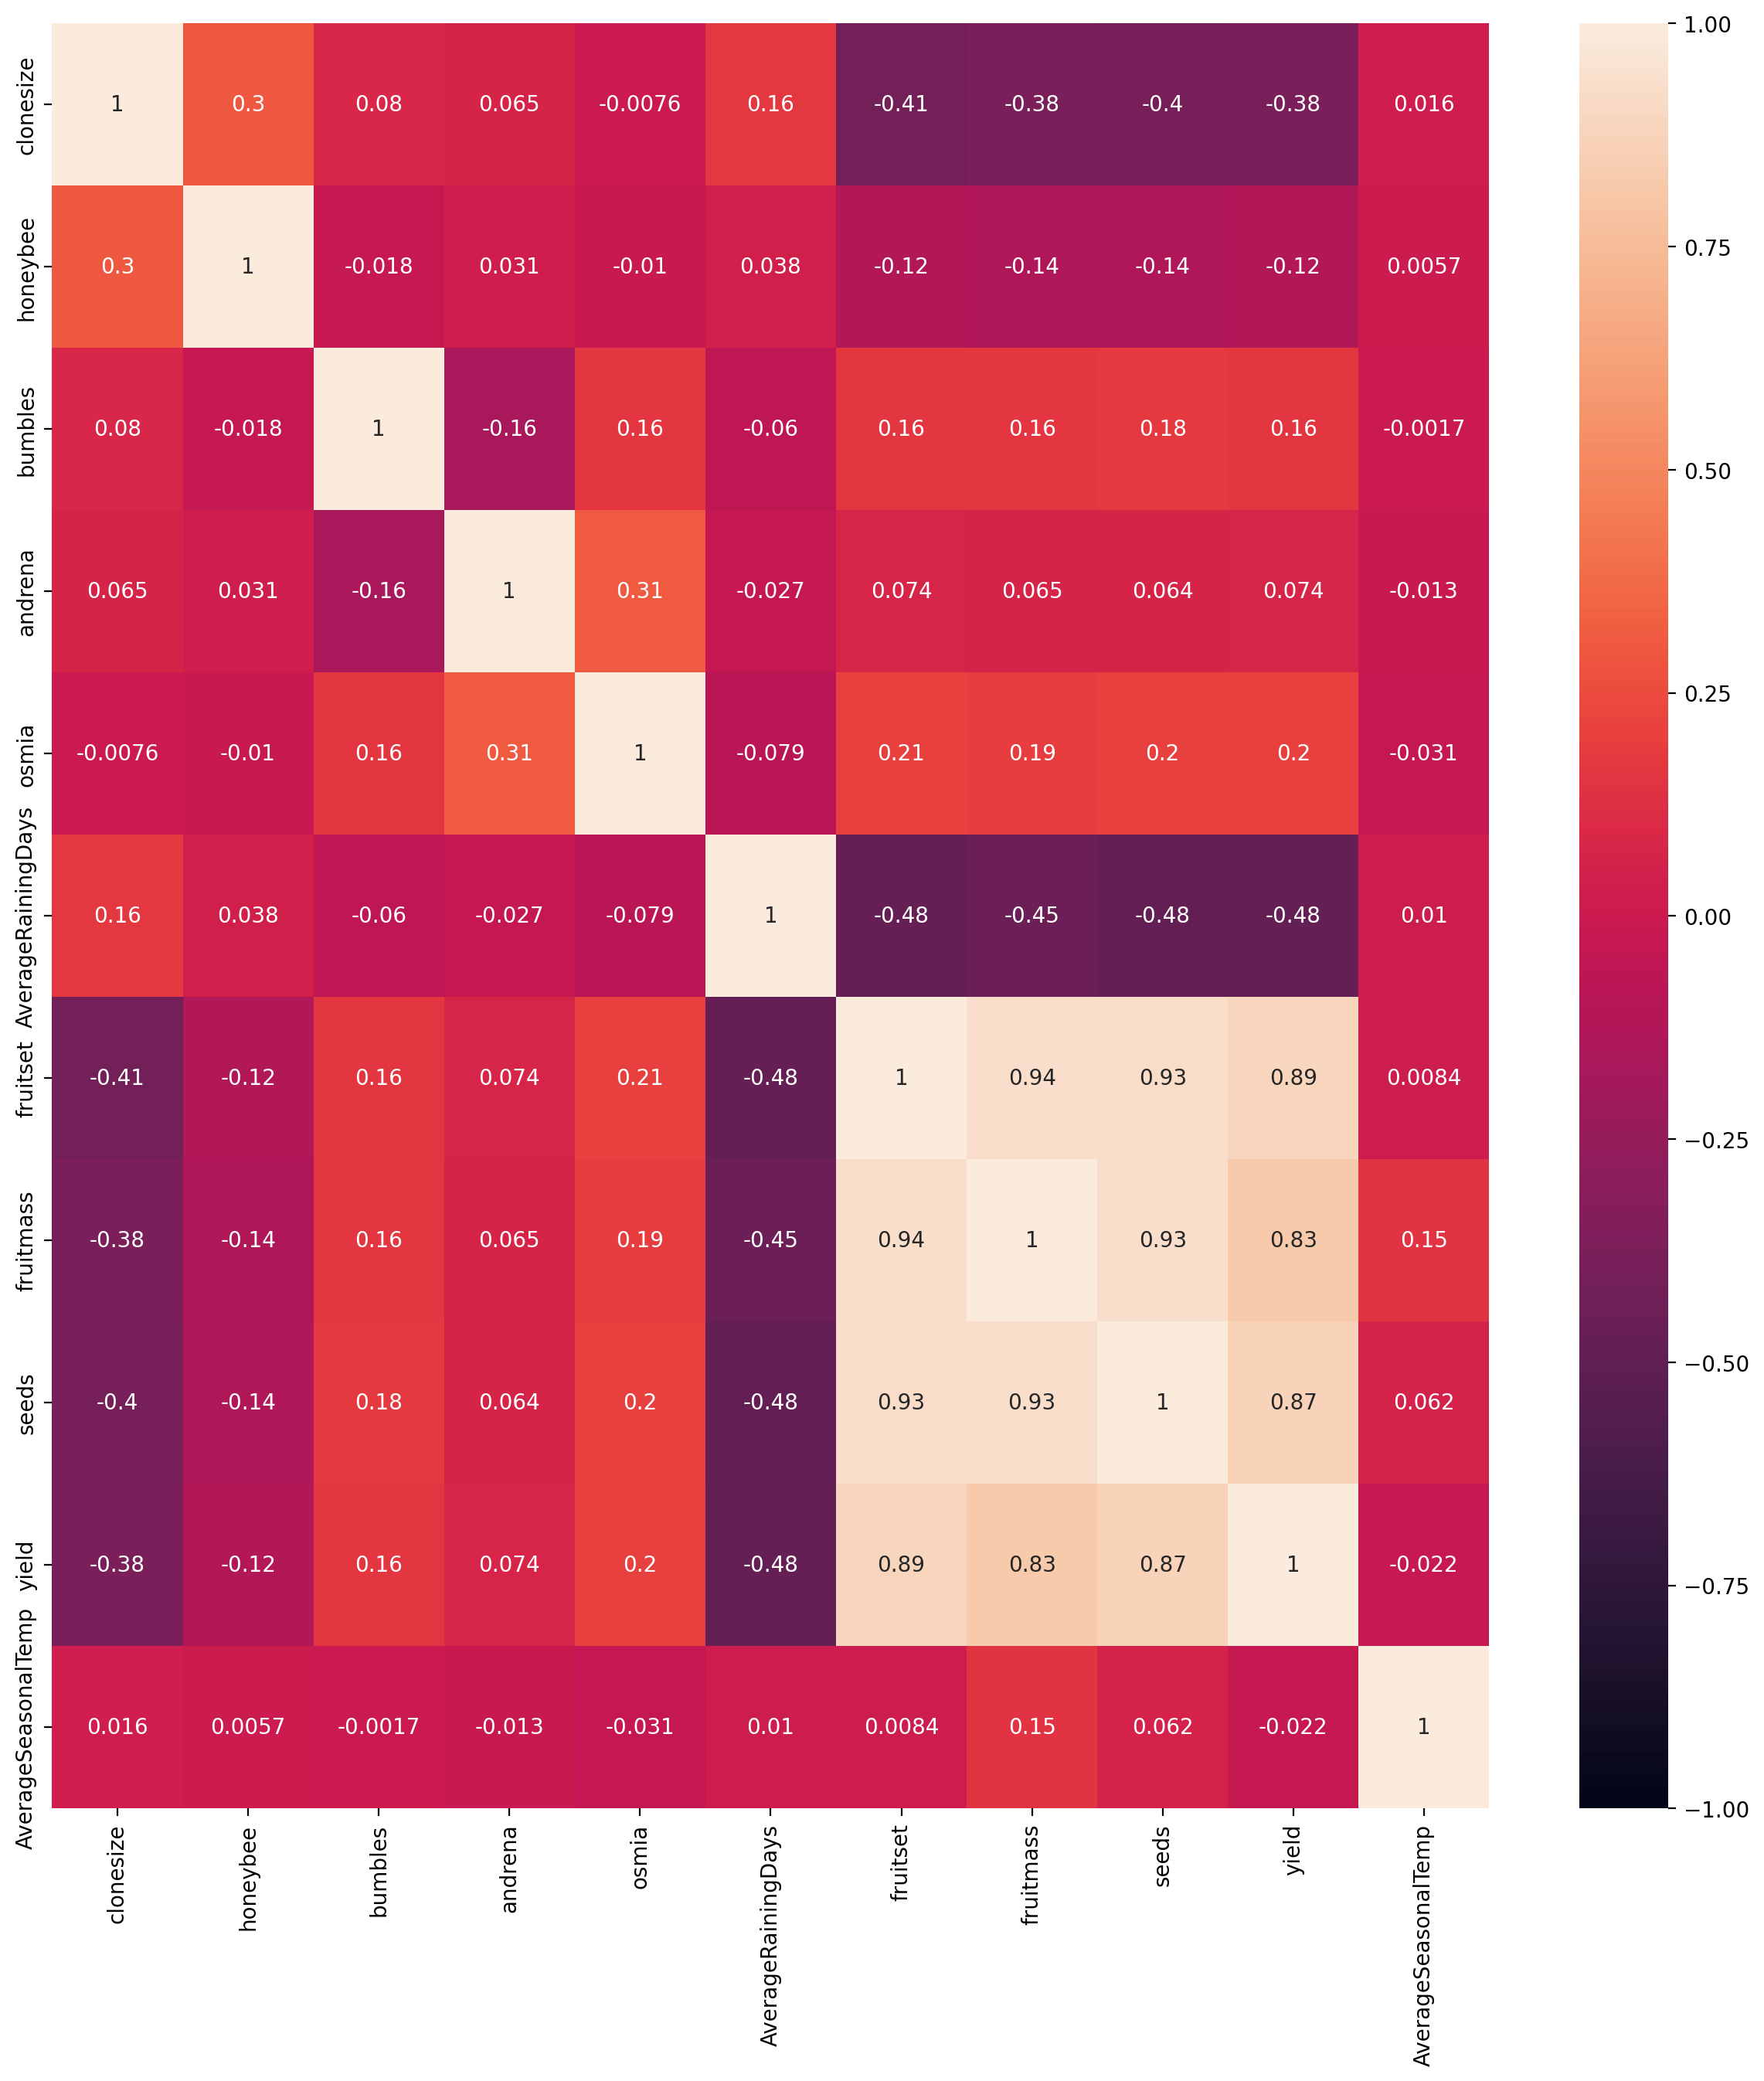

In [ ]:
plt.figure(figsize = (15, 15), dpi = 200)
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax =1)

In [ ]:
y = df['yield']
X = df.drop('yield', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state= 101)
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
x_test_scaled = scalar.transform(X_test)

# **Классические ML методы**

## **OLS**

In [192]:
metrics = {}

In [207]:

ols = LinearRegression(fit_intercept=True)

ols.fit(X= X_train_scaled, y = y_train)
preds_ols = ols.predict(x_test_scaled)
metrics = {'OLS':{'MAE':MAE(y_true= y_test, y_pred= preds_ols), 'RMSE':np.sqrt(MSE(y_true= y_test, y_pred= preds_ols)), 'R2':r2(y_test, preds_ols), 'MAPE':MAPE(y_test, preds_ols)}}
print (metrics)

{'OLS': {'MAE': 370.7431681127404, 'RMSE': np.float64(582.0786544777098), 'R2': 0.801088782233498, 'MAPE': 0.06575741968301978}}


In [ ]:
ols.coef_

array([ -26.12513956,   -1.44180934,   19.09740835,   16.99214421,
          5.23995316,  -83.65482096,  888.65856155, -283.46366011,
        553.44250952,  -27.82598946])

## **Ridge**


In [ ]:
ridge = RidgeCV(alphas=(0.01, 0.1, 1, 5, 10, 15, 50), fit_intercept=True, scoring='neg_mean_absolute_error' )
ridge.fit(X_train_scaled, y_train)



RidgeCV(alphas=(0.01, 0.1, 1, 5, 10, 15, 50), scoring='neg_mean_absolute_error')

In [208]:
preds_ridge = ridge.predict(x_test_scaled)
metrics['Ridge'] = {'MAE':MAE(y_true= y_test, y_pred= preds_ridge), 'RMSE':np.sqrt(MSE(y_true= y_test, y_pred= preds_ridge)), 'R2':r2(y_test, preds_ridge), 'MAPE':MAPE(y_test, preds_ridge)}
metrics['Ridge']

{'MAE': 370.74323946369026,
 'RMSE': np.float64(582.0787018451141),
 'R2': 0.8010887498601809,
 'MAPE': 0.0657574417837961}

## **LASSO**

In [160]:
lasso = LassoCV(n_alphas=1000, n_jobs=-1, alphas=(0.001, 0.1, 1, 5, 10, 15, 50), fit_intercept=True)
lasso.fit(X_train_scaled, y_train)



LassoCV(alphas=(0.001, 0.1, 1, 5, 10, 15, 50), n_alphas=1000, n_jobs=-1)

In [210]:
preds_lasso = ridge.predict(x_test_scaled)
metrics['Lasso'] = {'MAE':MAE(y_true= y_test, y_pred= preds_lasso), 'RMSE':np.sqrt(MSE(y_true= y_test, y_pred= preds_lasso)), 'R2':r2(y_test, preds_lasso),  'MAPE':MAPE(y_test,preds_lasso )}
metrics['Lasso']

{'MAE': 370.74323946369026,
 'RMSE': np.float64(582.0787018451141),
 'R2': 0.8010887498601809,
 'MAPE': 0.0657574417837961}

In [162]:
lasso.alpha_

np.float64(0.1)

# **Ансамблевые методы**

 ## **Decision Tree Regressor**

In [97]:
dtr = DecisionTreeRegressor(criterion='absolute_error')
grid_search_tree = GridSearchCV(dtr, {'splitter':('best', 'random'), 'max_depth':(50, 100, 300, None), 'min_samples_split':(2, 3, 5),
                                      'max_features':('sqrt', 'log2')}, n_jobs = -1, verbose = 2)
grid_search_tree.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=DecisionTreeRegressor(criterion='absolute_error'),
             n_jobs=-1,
             param_grid={'max_depth': (50, 100, 300, None),
                         'max_features': ('sqrt', 'log2'),
                         'min_samples_split': (2, 3, 5),
                         'splitter': ('best', 'random')},
             verbose=2)

In [104]:
dtr_best = DecisionTreeRegressor(criterion='absolute_error', **grid_search_tree.best_params_)
dtr_best.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=300,
                      max_features='log2', min_samples_split=5,
                      splitter='random')

In [211]:
preds_tree = dtr_best.predict(X_test)
metrics['Tree_regressor'] = {'MAE':MAE(y_true= y_test, y_pred= preds_tree), 'RMSE':np.sqrt(MSE(y_true= y_test, y_pred= preds_tree)), 'R2':r2(y_test, preds_tree,), 'MAPE':MAPE(y_test,preds_tree )}
metrics['Tree_regressor']

{'MAE': 463.3065207259647,
 'RMSE': np.float64(707.3530294950797),
 'R2': 0.7062564324999909,
 'MAPE': 0.08158665807158086}

## **Random Forest Regressor**


In [109]:
rfc = RandomForestRegressor(criterion='absolute_error')
rfc_grid = GridSearchCV(estimator=rfc,
                      param_grid={'max_depth':(50, 100, 300, None),
                                  'min_samples_split':(2, 3, 5),
                                  'max_features':('sqrt', 'log2')}, n_jobs = -1, verbose = 2)
rfc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestRegressor(criterion='absolute_error'),
             n_jobs=-1,
             param_grid={'max_depth': (50, 100, 300, None),
                         'max_features': ('sqrt', 'log2'),
                         'min_samples_split': (2, 3, 5)},
             verbose=2)

In [155]:
rfc_best = RandomForestRegressor(criterion = 'absolute_error', **rfc_grid.best_params_)
rfc_best.fit(X_train, y_train)


In [214]:
preds_rfc = rfc_best.predict(X_test)
metrics['RFR'] = {'MAE':MAE(y_true= y_test, y_pred= preds_rfc), 'RMSE':np.sqrt(MSE(y_true= y_test, y_pred= preds_rfc)), 'R2':r2(y_test, preds_rfc), 'MAPE':MAPE(y_test,preds_rfc )}
metrics['RFR']

{'MAE': 358.5306208190157,
 'RMSE': np.float64(569.524530977335),
 'R2': 0.8095763876924915,
 'MAPE': 0.06346805258812838}

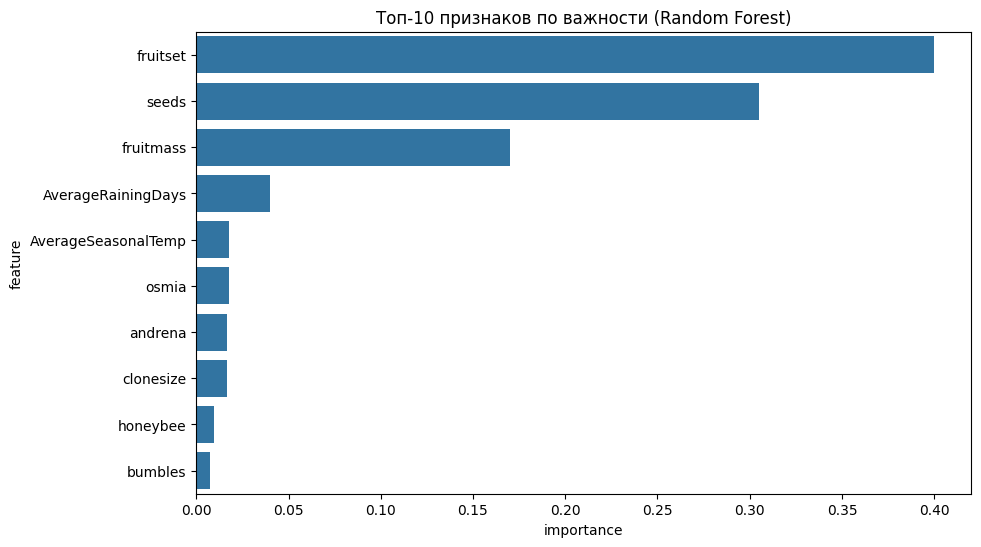

               feature  importance
6             fruitset    0.400105
8                seeds    0.304926
7            fruitmass    0.169909
5   AverageRainingDays    0.039770
9  AverageSeasonalTemp    0.017919
4                osmia    0.017611
3              andrena    0.016692
0            clonesize    0.016417
1             honeybee    0.009428
2              bumbles    0.007224


In [165]:

feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rfc_best.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_rf.head(10), x='importance', y='feature')
plt.title('Топ-10 признаков по важности (Random Forest)')
plt.show()

print(feature_importance_rf.head(10))

## **XGBoost**

In [126]:
X_train_boost, x_val, y_train_boost,  y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=101)

In [149]:
model_xgb = xgb.XGBRegressor(eval_metric = 'mae', tree_method='hist')
random_cv_xgb = RandomizedSearchCV(model_xgb, n_iter=15, param_distributions={'learning_rate':(0.01, 0.05, 0.1, 0.2), 'max_depth':( 6, 10, 15),
                                                                        'subsample':(0.5, 0.8, 1), 'n_estimators':(100, 200, 300)
                                                                        }, n_jobs = -1, verbose = 3)


random_cv_xgb.fit(X_train_boost,y_train_boost, verbose = 3)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='mae', feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=No...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'learning_rate': (0.01, 0.05, 0.1, 0.2),
                                        'max_depth': (6, 10, 15),
                                        'n_estimators': (100, 200, 300),
                                        'subsample': (0.5, 0.8, 1)},
                   verbose=3)

In [150]:
xgboost_best = xgb.XGBRegressor(**random_cv_xgb.best_params_, tree_method='hist', eval_metric='mae')
xgboost_best.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [215]:
preds_xgboost = xgboost_best.predict(X_test)
metrics['XGBoost'] = {'MAE':MAE(y_true= y_test, y_pred= preds_xgboost), 'RMSE':np.sqrt(MSE(y_true= y_test, y_pred= preds_xgboost)), 'R2':r2(y_test, preds_xgboost), 'MAPE':MAPE(y_test,preds_xgboost )}
metrics['XGBoost']

{'MAE': 351.272495796221,
 'RMSE': np.float64(556.9341115722831),
 'R2': 0.8179026747200414,
 'MAPE': 0.0618398003167223}

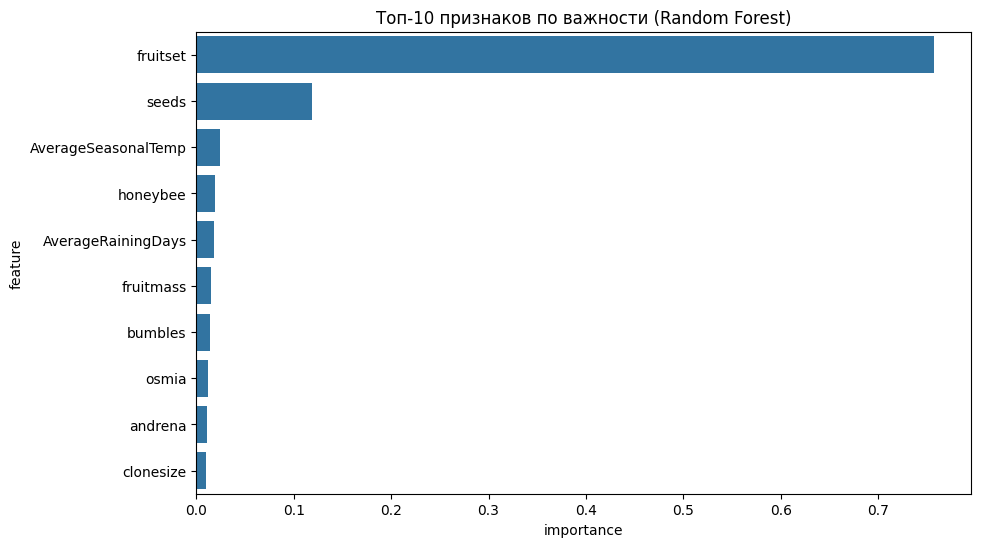

               feature  importance
6             fruitset    0.757601
8                seeds    0.119293
9  AverageSeasonalTemp    0.023994
1             honeybee    0.018829
5   AverageRainingDays    0.017809
7            fruitmass    0.015399
2              bumbles    0.013868
4                osmia    0.012477
3              andrena    0.010583
0            clonesize    0.010146


In [166]:

feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgboost_best.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_rf.head(10), x='importance', y='feature')
plt.title('Топ-10 признаков по важности (Random Forest)')
plt.show()

print(feature_importance_rf.head(10))

## **Нейронные сети**

In [168]:
class MLPRegressor(nn.Module):
    def __init__(self, input_size, hidden_sizes=[8, 4, 2], dropout_rate=0.25):
        super(MLPRegressor, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size

        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.ReLU())

        self.networks = nn.Sequential(*layers)

    def forward(self, x):
        return self.networks(x)

In [170]:
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(x_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

In [171]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [180]:
def train_mlp(model, train_loader, num_epochs=100, learning_rate=0.05):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 1e-5)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

    train_losses = []
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        scheduler.step()
        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        if (epoch + 1) % 20 == 0:
            print(f'Epoch loss = {avg_loss:.4f}')

    return train_losses

In [173]:
mlp_model = MLPRegressor(input_size=X_train_scaled.shape[1])

In [181]:
train_losses = train_mlp(mlp_model, train_loader, num_epochs=500)

Epoch loss = 5722787.6745
Epoch loss = 5278889.5938
Epoch loss = 5524646.7096
Epoch loss = 5305578.1628
Epoch loss = 5306824.7435
Epoch loss = 5343880.1771
Epoch loss = 5222637.7160
Epoch loss = 5363651.4805
Epoch loss = 5312304.3737
Epoch loss = 5323339.2168
Epoch loss = 5388090.8919
Epoch loss = 5420131.2305
Epoch loss = 5441120.4766
Epoch loss = 5357051.7995
Epoch loss = 5381448.4492
Epoch loss = 5326978.0560
Epoch loss = 5357091.3125
Epoch loss = 5508426.8047
Epoch loss = 5284405.2839
Epoch loss = 5340118.4922
Epoch loss = 5449305.1061
Epoch loss = 5415234.6393
Epoch loss = 5418073.9010
Epoch loss = 5476703.5742
Epoch loss = 5505496.5482


<Axes: >

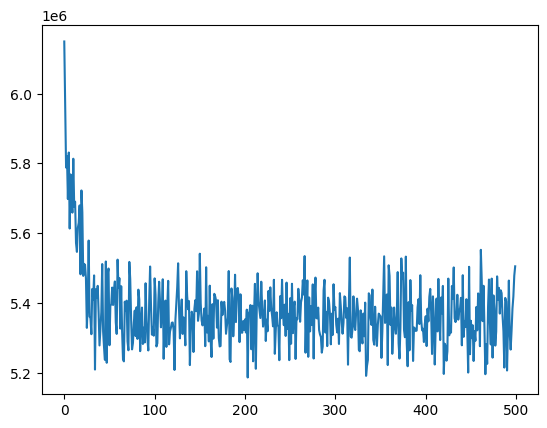

In [182]:
sns.lineplot(train_losses)

In [217]:
mlp_model.eval()
with torch.no_grad():
    mlp_preds = mlp_model(X_test_tensor).numpy().flatten()


metrics['mlp'] = {'MAE':MAE(y_true= y_test, y_pred= mlp_preds), 'RMSE':np.sqrt(MSE(y_true= y_test, y_pred= mlp_preds)), 'R2':r2(y_test, mlp_preds), 'MAPE':MAPE(y_test,mlp_preds )}
metrics['mlp']

{'MAE': 938.1296166271869,
 'RMSE': np.float64(1114.744303003089),
 'R2': 0.270464462489585,
 'MAPE': 0.14789851498393428}

## **Сравнение обученных моделей**

In [225]:
metrics_df = pd.DataFrame(metrics).T
metrics_df = np.round(metrics_df, 3)

In [226]:
metrics_df.sort_values(by='MAE', ascending = True)

,MAE,RMSE,R2,MAPE
XGBoost,351.272,556.934,0.818,0.062
RFR,358.531,569.525,0.810,0.063
OLS,370.743,582.079,0.801,0.066
Ridge,370.743,582.079,0.801,0.066
Lasso,370.743,582.079,0.801,0.066
Tree_regressor,463.307,707.353,0.706,0.082
mlp,938.130,1114.744,0.270,0.148


# **Предсказание на тестовых (неразмеченных) данных**

In [231]:
test_df = pd.read_csv('test.csv')
test_df['AverageSeasonalTemp'] = (test_df['AverageOfLowerTRange']+test_df['AverageOfUpperTRange'])/2
idx = test_df['id']
test_df = test_df.drop(['id', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays'], axis = 1)


In [232]:
final_preds_xgboost = xgboost_best.predict(test_df)


In [240]:
final_preds_xgboost_df = pd.DataFrame(data= {'id':idx, 'yield':final_preds_xgboost})
final_preds_xgboost_df = final_preds_xgboost_df.set_index('id')

In [241]:
final_preds_xgboost_df.to_csv('blueberry.csv')